# Tails in social data
Fiona Pigott

This is going to be a multi-part tutorial on dealing with long-tail distributions in a social data context. This first tutorial will define some vocabulary, look a few different distributions, glance at some empirical data, and introduce a nifty little python package [powerlaw](https://github.com/jeffalstott/powerlaw/) for fitting distributions (power law, lognormal and exponential) by Jeff Alstott. 

## Resources
- [Not every long tail is power law!](http://www.philippsinger.info/?p=247) by Philipp Singer of the [GESIS - Leibniz Institute for the Social Sciences](http://www.gesis.org/home/) 
- [Power-Law Distributions in Empirical Data](http://dx.doi.org/10.1137/070710111) by Aaron Clauset, Cosma Rohilla Shalizi, and M. E. J. Newman
- [Slides](http://users.cms.caltech.edu/~adamw/heavytails.html) and [blog posts](https://rigorandrelevance.wordpress.com/2013/11/15/a-tale-of-heavy-tails/) on _The Fundamentals of Heavy Tails: Properties, Emergence, and Identification_ by  Adam Wierman, Bert Zwart, JK Nair of Caltech
- _An Introduction to Heavy-Tailed and Subexponential Distributions_ by Sergey Foss, Dmitry Korshunov, Stan Zachary
- And of course, [Wikipedia](https://www.wikipedia.org/)

In [1]:
# Plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# mathematics
from math import exp, pi, sqrt, log
from numpy import linspace, hstack
from collections import Counter
from random import sample
from random import uniform
from functools import reduce

# special powerlaw fitting library
import powerlaw

In [2]:
# x values
x = linspace(0,5,1000)

# Heavy tails

Confession: I absolutely did not know this until I read the Wikipedia article

**Definition: A non-negative function (usually tending to zero) is heavy-tailed
if it fails to be bounded by a decreasing exponential function.**

There are many subtypes of heavy tailed distributions, **one** of which is a long tailed distribution. If you're like me, you just now learned that "long" and "heavy" are not interchangeable when referring to tails.  ¯\\\_(ツ)_/¯

## Exponential Distribution
The exponential distribution is often used to model the time between events (say, the time between Tweets from a particualr user). This is only a valid model if:
 - Events (Tweets) occur independently.
 - The rate at which events occur is constant. 

The PDF of the exponential distribution is: $ f(x) = \lambda e^{-\lambda x} $, where $\lambda$ is commonly referred to as the rate parameter, or the average amount of time between two events (Tweets).

The exponential distribution is **not** a long-tailed distribution, but any function with more mass in the tail (tail = $x \rightarrow \infty$) than the exponential is a **_heavy tailed_** distribution.

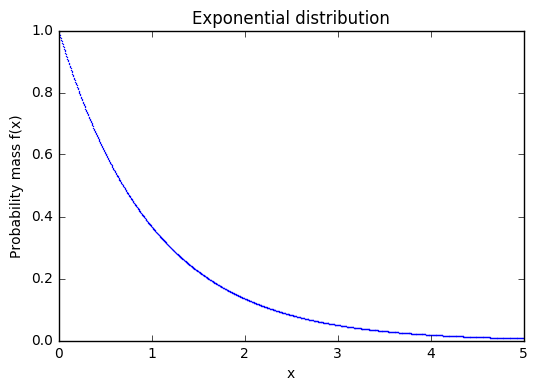

In [3]:
def exponential_dist(x, lam):
    ''' 
    x: iterable of x values
    lam: rate parameter value for the exponential distribution
    returns: list of values of the PDF of an exponential distribution evaluated at every point in x
    '''
    return [lam*exp(-1*lam*point) for point in x]

# lambda value
l = 1
_ = plt.plot(x, exponential_dist(x,l),'.', markersize = 1)
_ = plt.xlabel("x")
_ = plt.ylabel("Probability mass f(x)")
_ = plt.title("Exponential distribution")

# Long tails

A distribution has a long tail if:

$ \lim_{x \rightarrow \infty} \Pr[ X > x + t \,|\, X > x ] = 1 \;\; \forall t > 0$

Thinking about the simple case of a Power Law distribution:  
CDF: $\Pr[X > x] = cx^{-a}$  
PDF: $p(x) = cax^{-(a+1)}$ 

We can solve the limit in the definition of long-tails:

Definition: $ \lim_{x \rightarrow \infty} \Pr[ X > x + t \,|\, X > x ] $  

Bayes law: $ \lim_{x \rightarrow \infty} \frac{\Pr[ X > x + t \, \cap \, X > x ]}{\text{P}[ X > x]} $  

Now $ X > x + t \implies X > x $, so $\Pr[ X > x + t \, \cap \, X > x ] = \text{P}[ X > x + t] $

Rewritten: $ \lim_{x \rightarrow \infty} \frac{\Pr[ X > x + t]}{\text{P}[ X > x]} $

Evaluate with the CDF: $ \lim_{x \rightarrow \infty} \frac{c(x+t)^{-a}}{cx^{-a}}  = \lim_{x \rightarrow \infty} \frac{(x+t)^{-a}}{x^{-a}} = 1$

An intuitive explantion of this property from the wikipedia article: if the long-tailed quantity exceeds some high level, the probability approaches 1 that it will exceed any other higher level."

# Subexponential distributions

A subexponentail distribution satisfies what is called "the catastrophe principle." To use a Twitter example: if Skippy, Josh, Brian, Jeff, and Kim Kardashian have 50 million Twitter followers between them, which scenario is more likely: 
 1. Each person has 1 million followers
 2. One person has ~50 million followers (it's Skippy for sure)
The answer is "2": one of the users has a huge number of followers, the others have a comparatively small number. This is called the "catastrophe principle"--one catastrophically large value increases the entire sum.

The formal definition of a subexponential distribution is that it satisfies:
$\Pr[X_1+ \cdots +X_n>x] \sim \Pr[\max(X_1, \ldots,X_n)>x] \quad \text{as } x \to \infty$

In words: the probability that the sum of Twitter followers is 50 million is about the same as the probability that one of the users in the sum has 50 million followers.


## Pareto Distribution

The Pareto distribution is (by definition) a Power Law Distribution.

The PDF of the Pareto distribution is parameterized as: 
$
f(x) = \big \{ \begin{array}{ll} \alpha \, x_m^\alpha \, x^{-(\alpha + 1)} & x\geq x_m \\ 0 & x\leq x_m \\ \end{array} 
\;, \alpha \geq 0 $

The Pareto distribution is a heavy tailed distribution; it is also a long-tailed distribution, a power law distribution, and a subexponential distribution.

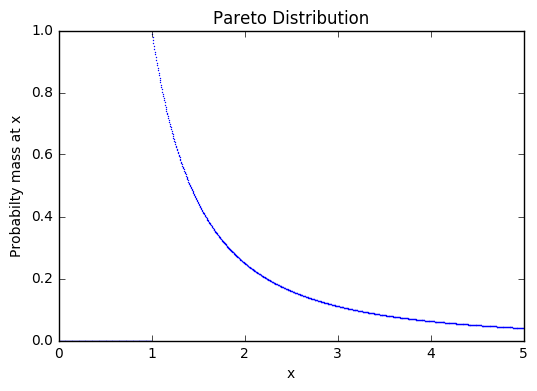

In [ ]:
def pareto_dist(x, xm, alpha):
    '''
    x: iterable of x values
    xm: parameter x_m
    alpha: parameter alpha
    '''
    pdf = []
    for point in x:
        if point < xm:
            pdf.append(0)
        else:
            pdf.append(alpha*(xm**alpha)/point**(alpha+1))
    return pdf

# lambda value
xm = 1
alpha = 1
_ = plt.plot(x, pareto_dist(x, xm, alpha), '.', markersize = 1)
_ = plt.ylabel("Probabilty mass at x")
_ = plt.xlabel("x")
_ = plt.title("Pareto Distribution")

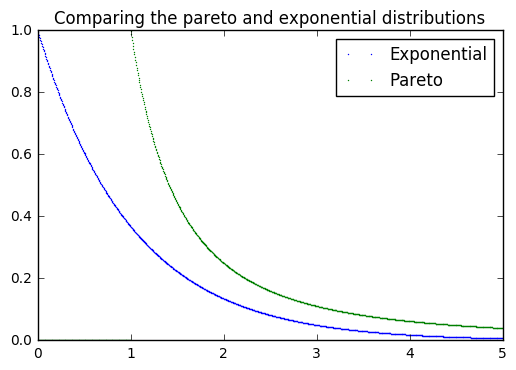

In [ ]:
_ = plt.plot(x, exponential_dist(x,l),'.', markersize = 1)
_ = plt.plot(x, pareto_dist(x, xm, alpha), '.', markersize = 1)
_ = plt.legend(["Exponential", "Pareto"])
_ = plt.title("Comparing the pareto and exponential distributions")

In [ ]:
x_tail = linspace(0,100,10000)
_ = plt.plot(x_tail, exponential_dist(x_tail,l),'.', markersize = 1)
_ = plt.plot(x_tail, pareto_dist(x_tail, xm, .01), '.', markersize = 1)
_ = plt.legend(["Exponential, lambda = 1", "Pareto, alpha = .01"])
_ = plt.title("The heavy tail eventually wins (for all alpha)")
_ = plt.axis([0,100,0,.03])

## LogNormal Distribution

### A quick note on: the normal distribution

It looks like this 😁:  
$ f(x) =\frac{1}{\sqrt{2\sigma^2\pi}} e^{-(x - \mu)^2 / \, 2\sigma^2} $

In [ ]:
def normal_dist(x, sigma = 1, mu = 0):
    '''
    x: iterable of x values
    sigma: variance
    mu: mean
    '''
    return [1/(sqrt(2*(sigma**2)*pi)) * exp(-(point - mu)**2)/(2*(sigma**2)) for point in x]

mu = 0
sigma = 1
x_mirrored = hstack([-x,x])
_ = plt.plot(x_mirrored, normal_dist(x_mirrored, sigma, mu), '.', markersize = 1)
_ = plt.ylabel("Probabilty mass at x")
_ = plt.xlabel("x")
_ = plt.title("Normal Distribution")

## LogNormal Distribution

The LogNormal distribution is, maybe unsurprisingly, a distribution whose logarithm is normally distributed. 

The PDF of the LogNormal is: $ f(x) = \frac{1}{x\sigma\sqrt{2\pi}} \, \text{exp} [ -\frac{(\text{ln}x - \mu)^2}{2\sigma^2} ], x>0 $

The LogNormal distribution is a heavy tailed distribution, a long tailed distribution, and a subexponential distribution.

In [ ]:
def lognormal_dist(x, sigma, mu):
    '''
    x: iterable of x values
    sigma: parameter sigma
    mu: parameter mu
    '''
    pdf = []
    for point in x:
        pdf.append((1/(point*sigma*sqrt(2*pi))) * exp(-(log(point) - mu)**2 / (2*sigma**2)) )
    return pdf
mu = 0
sigma = 1
x_nonzero = x[x != 0]
_ = plt.plot(x_nonzero, lognormal_dist(x_nonzero, sigma, mu), '.', markersize = 1)
_ = plt.ylabel("Probabilty mass at x")
_ = plt.xlabel("x")
_ = plt.title("LogNormal Distribution")

In [ ]:
_ = plt.semilogx(x_nonzero, lognormal_dist(x_nonzero, sigma, mu), '.', markersize = 1)
_ = plt.title("'The logarithm of x is normally distributed'")

## Central limits

The central limit theorem that all undergraduates know and love: the sum of independent, identically distributed random variables goes to the normal distribution.

In a later tutorial, I hope to get into when that breaks down theoretically (when those iid random variables have infinite varience, the limit is, in fact, a heavy-tailed distribution and not a normal distribution at all) and when it breaks down practically (obviously, real data cannot have infinite variance, but it can have very, very large variance).

For now, I'm going to use the central limit theorem that we know and love to look at the limit of multaplicative (not additive) processes. **Multaplicative processes almost always lead to heavy tails**

In [ ]:
# samples of a process
sums_of_uniform_samples = []
for i in range(0,1000):
    sums_of_uniform_samples.append(sum([uniform(1,2) for x in range(0,1000)]))

In [ ]:
_ = plt.hist(sums_of_uniform_samples,25)
_ = plt.title("The Central Limit Theorem works! Hooray!")

In [ ]:
# now, instead lets multiply together samples of the same (uniform) process
multiply_uniform_samples = []
for i in range(0,1000):
    multiply_uniform_samples.append(reduce(lambda x, y: x*y, [uniform(1,2) for x in range(0,1000)]))

### Multaplicative central limit

Recall that $ x \cdot y = \log(x) + \log(y) $

If a multaplicative process is a process where we are multiplying together many iid random variables, then:

$ P_n = X_1 \cdot X_2 \cdot X_3 \cdots \cdot X_n $  
$ \log(P_n) = \log(X_1) + \log(X_2) + \log(X_3) + \cdots \log(X_n) $  
And applying the central limit theorm, $\log(P_n) \sim N(\mu, \sigma^2) $ for some $\mu, \sigma^2$

In [ ]:
# note that I'm taking the log of the data before histogramming it 
_ = plt.hist([log(x) for x in multiply_uniform_samples],50)
_ = plt.title("The LogNormal Distribution. Whoa.")
_ = plt.xlabel("log(x)")

## Fitting data

My last note (and here there will be much more explanation in future notebooks), is on fitting a little bit of real data. Because real data is fun.

In [ ]:
# This is a random list of follower counts for people on Twitter
followers = []
for follower_count in sorted(open("random_selection_of_followers.txt","r").read().split("\n")):
    try:
        followers.append(int(follower_count))
    except ValueError:
        pass
# I'm grabbing exacly 1 million of those counts, because 1 million is a nice tidy number
followers = sorted(sample(followers, 10**6))

A common way of plotting these kinds of distributions is a rank-oreder plot, or (pictured below) a complementary cumulated distribution function (CCDF) with the idea that we want to visualize the probability that $X$ has frequency greater or equal to $x$.

I simply order the observations of the number of followers and plot the fraction of users greater than $x$ against $x$ (the actual follower count).

In [ ]:
_ = plt.loglog(followers, [1 - i/10**6 for i in range(0,10**6)], '.', markersize = 1)
_ = plt.title("Follower counts on Twitter")
_ = plt.ylabel("Probabilty that the number of followers \n of a given user is greater than x")
_ = plt.xlabel("x")

In [ ]:
# since follow counts are discrete, it's easy to bin them by making each bin 1 follower long
freq_of_follow_counts = sorted(Counter(followers).items(), key = lambda x:x[0])
# follow counts
follow_count = [x[0] for x in freq_of_follow_counts]
# frequency of each follower count
frequency = [x[1] for x in freq_of_follow_counts]

In [ ]:
_ = plt.loglog(follow_count, frequency, '.')
_ = plt.title("# of followers of random Twitter users")
_ = plt.xlabel("# of followers x")
_ = plt.ylabel("# of people with x followers")

## The powerlaw Python library

A nice person made this thing. It's not the final word on fitting long tailed distributions to empirical data, but it's based on solid statistics and it enables us to fit power law and lognormal distributions to the same dataset and compare them.

In [ ]:
# run a "fit" on the vector of all 1 million follower numbers
results = powerlaw.Fit(followers)
# https://github.com/jeffalstott/powerlaw/issues/28 <- I know you get a warning, 
#                                                       he knows you get a warning, it's not a big deal

In [ ]:
print("The alpha value of the Pareto distribution that fits this data best: {}.".format(results.power_law.alpha))
print("The x_m value of the Pareto distribution that fits this data best: {}.".format(results.power_law.xmin))

In [ ]:
print("The sigma value of the LogNormal distribution that fits this data best: {}.".format(results.lognormal.sigma))
print("The mu value of the LogNormal distribution that fits this data best: {}.".format(results.lognormal.mu))

In [ ]:
# Importantly, this package allows you to compare the powerlaw and lognormal distributions
'''
R is the log-likelihood ratio between both distributions and p is the p-value. 
Generally, we can say that if R is positive, than the first distribution is a better fit while if it is negative, 
the second one should be prefered. 
'''
R, p = results.distribution_compare('power_law', 'lognormal') 

print("The R value: {}".format(R))
print("The p-value: {}".format(p))

In [ ]:
# Those results don't look very good, but sometimes real distributions can seem mroe piecewise
# let's try fitting jsut the top piece of that distribution
results_without_tail = powerlaw.Fit([i for i in followers if i <= 10**2.5]) 

In [ ]:
R_without_tail, p_without_tail = results_without_tail.distribution_compare('power_law', 'lognormal') 

print("The R value: {}".format(R_without_tail))
print("The p-value: {}".format(p_without_tail))

In [ ]:
print("The sigma value of the LogNormal distribution that fits this data best: {}.".format(results_without_tail.lognormal.sigma))
print("The mu value of the LogNormal distribution that fits this data best: {}.".format(results_without_tail.lognormal.mu))

In [ ]:
cuttoff_index_number = [ n for n,i in enumerate(followers) if i > 10**2.5 ][0]

In [ ]:
results_1.lognormal.plot_pdf()
plt.loglog([i for i in follow_count], [i/10**6 for i in frequency], 'r.', markersize = 1)
plt.title("LogNormal fit on empirical data")

In [ ]:
results_1.power_law.plot_pdf()
plt.loglog([i for i in follow_count], [i/10**6 for i in frequency], 'r.', markersize = 1)
plt.title("Powerlaw fit on empirical data")